In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime

In [2]:
df = pd.read_csv("weatherHistory.csv")

In [3]:
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)
df["Year"] = df["Formatted Date"].dt.year
df["Day_Year"] = df["Formatted Date"].dt.dayofyear
df = df.groupby(["Day_Year", "Year"])["Temperature (C)"].mean().reset_index()
df.head()

,Day_Year,Year,Temperature (C)
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407


In [4]:
X = df["Day_Year"].values
Y = df["Temperature (C)"].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.MeanSquaredError())

In [9]:
model.fit(X_train, Y_train, epochs=500)

Epoch 1/500

95/95 [==============================] - 2s 3ms/step - loss: 104.2120
Epoch 2/500
95/95 [==============================] - 0s 3ms/step - loss: 99.4231
Epoch 3/500
95/95 [==============================] - 0s 2ms/step - loss: 96.6443
Epoch 4/500
95/95 [==============================] - 0s 3ms/step - loss: 93.7697
Epoch 5/500
95/95 [==============================] - 0s 2ms/step - loss: 94.1283
Epoch 6/500
95/95 [==============================] - 0s 3ms/step - loss: 91.0174
Epoch 7/500
95/95 [==============================] - 0s 3ms/step - loss: 89.1943
Epoch 8/500
95/95 [==============================] - 0s 2ms/step - loss: 91.3935
Epoch 9/500
95/95 [==============================] - 0s 2ms/step - loss: 83.0682
Epoch 10/500
95/95 [==============================] - 0s 3ms/step - loss: 81.8607
Epoch 11/500
95/95 [==============================] - 0s 2ms/step - loss: 75.4552
Epoch 12/500
95/95 [==============================] - 0s 2ms/step - loss: 61.2133
Epoch 13/500
95/95 [===

95/95 [==============================] - 0s 2ms/step


Text(0, 0.5, 'Temperature')

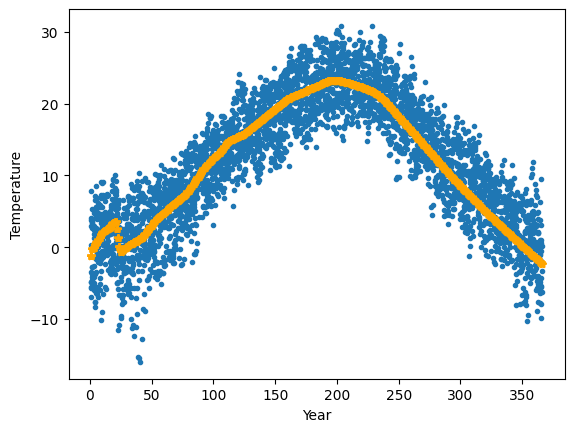

In [20]:
Y_pred = model.predict(X_train)
plt.scatter(X, Y, marker=".")
plt.plot(X_train, Y_pred, "*", c= "orange")
plt.xlabel("Year")
plt.ylabel("Temperature")